In [1]:
from BertFineTuning.loader import *
from BertFineTuning.loader_config import default_loader_config
from BertFineTuning.duplicate_detection import *
from transformers.optimization import AdamW
import torch
%matplotlib inline

In [2]:
BFT=BertFineTuning()

In [3]:
BFT.criterion=nn.CrossEntropyLoss()
BFT.optimizer = AdamW(BFT.parameters_main)
BFT.scheduler=torch.optim.lr_scheduler.MultiStepLR(BFT.optimizer, milestones=[])

In [4]:
dataloader_config={
# 'bert_train_split':default_loader_config,
# 'bert_test_split':default_loader_config,
# 'bert_valid_split':default_loader_config,
}

In [5]:
cwd = os.getcwd()
processed_data_folder=os.path.join(cwd,'data','processed')
ml=MultiLoader(processed_data_folder,dataloader_config,max_token_length=100)

WARNING - bert_test_split.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - bert_train_split.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - bert_valid_split.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - dev_v1_1.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.
WARNING - dev_v1_1_2.csv
File does not have a valid  data loader configuration in dataloader_config, using default_loader_config.


In [7]:
BFT.train(model_config,ml.bert_train_split,ml.bert_valid_split,epochs=100,print_every=100,validate_at_epoch=0)

epoch:  1  step:  1 / 1212
Batch Loss:  0.8944763357591148
train results: 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.029625189750461984, 1.0: 0.029625189750461984}
Accuracy:  {0.0: 0.515, 1.0: 0.515}
{'F1 Macro ': 0.5146966854283928} {'F1 Micro': 0.515}
{'F1 ': {0.0: 0.526829268292683, 1.0: 0.5025641025641026}}
Precision:  {0.0: 0.5346534653465347, 1.0: 0.494949494949495}
recall:  {0.0: 0.5192307692307693, 1.0: 0.5104166666666666}
Predict   0.0       1.0       
Actual
0.0       54        50        

1.0       47        49        




KeyboardInterrupt: 

In [6]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

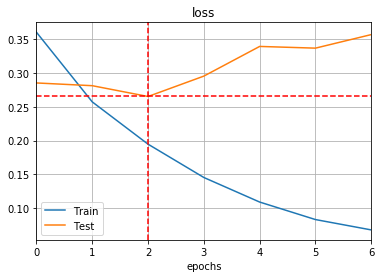

In [10]:
df_loss=pd.DataFrame([[np.mean(item) for item in chunks(BFT.loss_history,4900)],BFT.test_loss_history]).T
df_loss.index.name='epochs'
df_loss.columns=['Train','Test']
ax=df_loss.plot(title='loss',grid=True)
ax.axvline(2, color="red", linestyle="--")
ax.axhline(np.min(BFT.test_loss_history), color="red", linestyle="--")

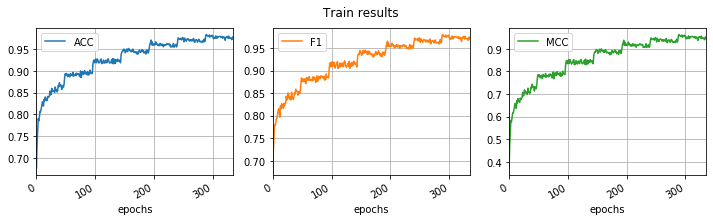

In [11]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Train results',grid=True);

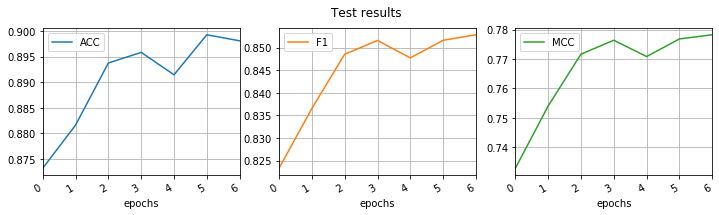

In [12]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Test results',grid=True);

In [5]:
from transformers import BertTokenizer, BertForQuestionAnswering,DistilBertForQuestionAnswering, BertConfig

In [8]:
BertForQuestionAnswering.from_pretrained('bert-base-uncased')

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [10]:
x=BertForQuestionAnswering.from_pretrained('bert-base-uncased')

Linear(in_features=768, out_features=2, bias=True)